## Student Performance Indicator

#### Life cycle of machine learning project

* Understanding the problem statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model training
* Choose best model

#### Problem Statement

* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, parental level of education, lunch and test preparation cource

#### Data Collection

* The datset has been taken from kaggle which consists of 8 columns and 1000 rows.

#### Import Data and required packages

* importing pandas, numpy, matplotlib, seaborn and warnings library

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [81]:
df =pd.read_csv(r'D:\mlproject\Notebook\Data\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [82]:
df.shape

(1000, 8)

## Data Set Information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Data checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

##### Check Missing values

In [84]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### Check duplicates

In [85]:
df.duplicated().sum()

0

##### Check data types

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Check the number of unique values of each column

In [87]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### Check statstics of the dataset

In [88]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [89]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [90]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [91]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


##### Define numerical & categorical columns

In [92]:
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('we have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('\nwe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##### Adding columns for "total score" and "Average

In [93]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [94]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [95]:
reading_full = df[df['reading_score']==100]['Average'].count()
writing_full = df[df['writing_score']==100]['Average'].count()
maths_full = df[df['math_score']==100]['Average'].count()

print(f'NUmber of students with full marks in reading: {reading_full}')
print(f'NUmber of students with full marks in writing: {writing_full}')
print(f'NUmber of students with full marks in maths: {maths_full}')

NUmber of students with full marks in reading: 17
NUmber of students with full marks in writing: 14
NUmber of students with full marks in maths: 7


In [96]:
reading_less_20 = df[df['reading_score']<=20]['Average'].count()
writing_less_20 = df[df['writing_score']<=20]['Average'].count()
maths_less_20 = df[df['math_score']<=20]['Average'].count()

print(f'NUmber of students with less than 20 marks in reading: {reading_less_20}')
print(f'NUmber of students with less than 20 marks in writing: {writing_less_20}')
print(f'NUmber of students with less than 20 marks in maths: {maths_less_20}')

NUmber of students with less than 20 marks in reading: 1
NUmber of students with less than 20 marks in writing: 3
NUmber of students with less than 20 marks in maths: 4


#### Histogram and KDE

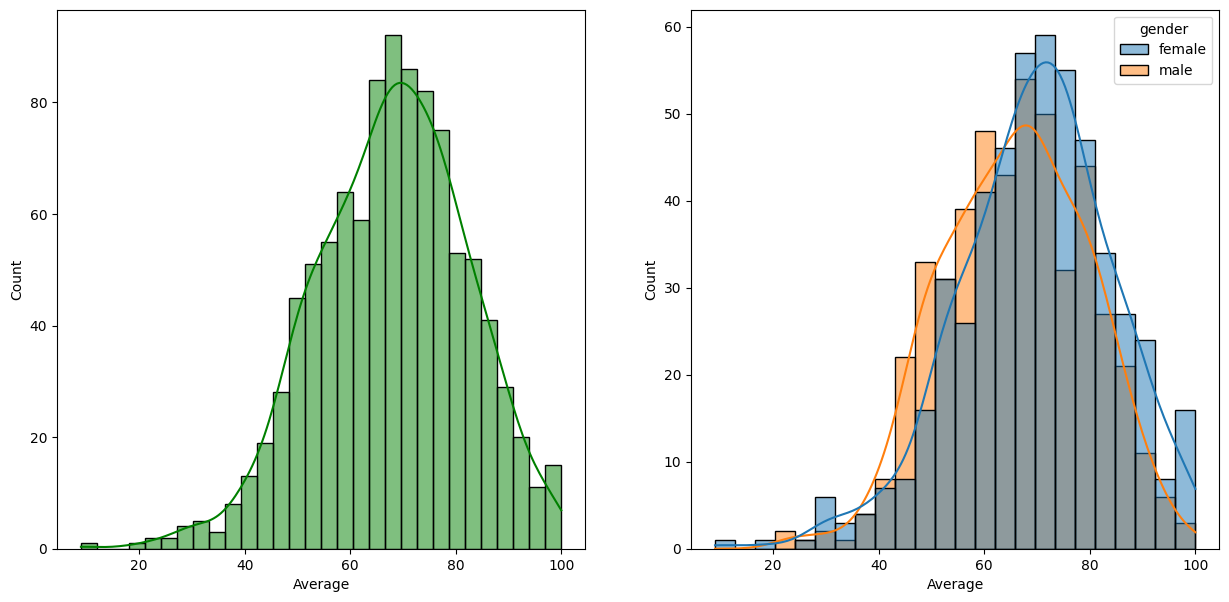

In [97]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True, hue='gender')
plt.show()

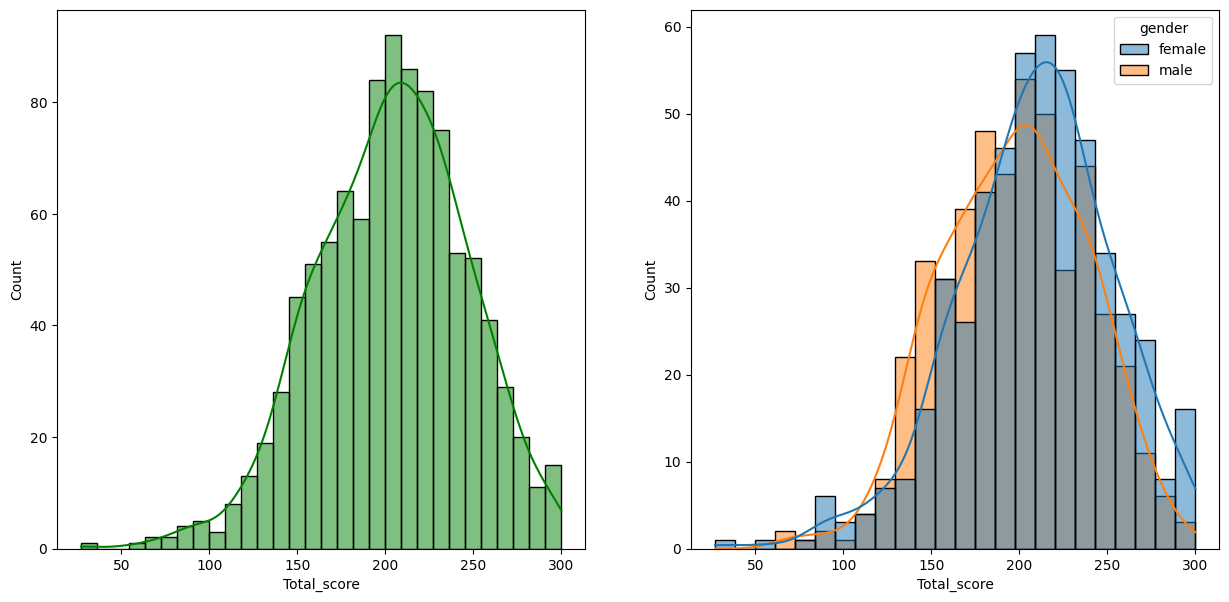

In [98]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True, hue='gender')
plt.show()

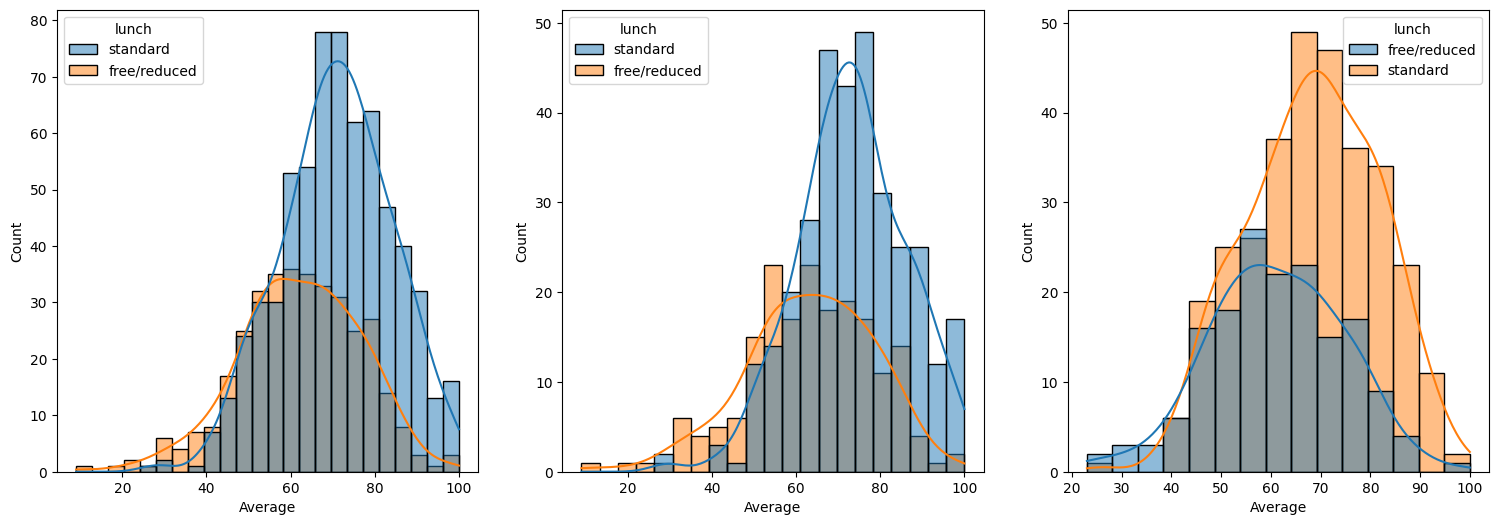

In [99]:
fig, axs = plt.subplots(1,2,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True, hue='lunch')
plt.show()

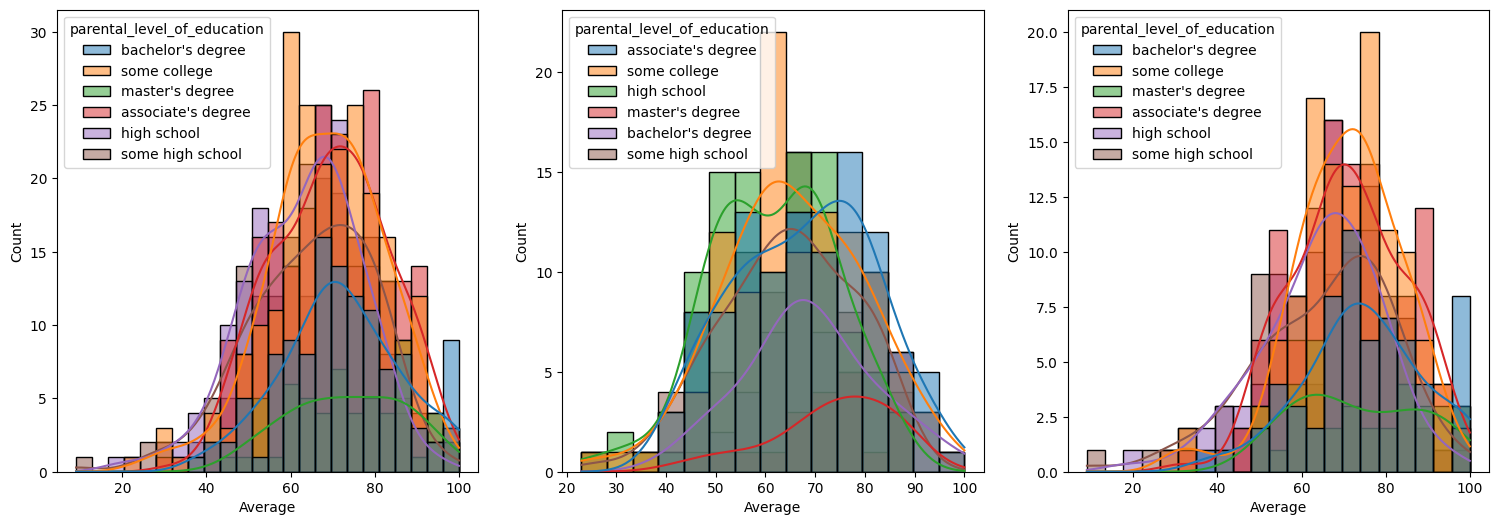

In [100]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()


Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female stude

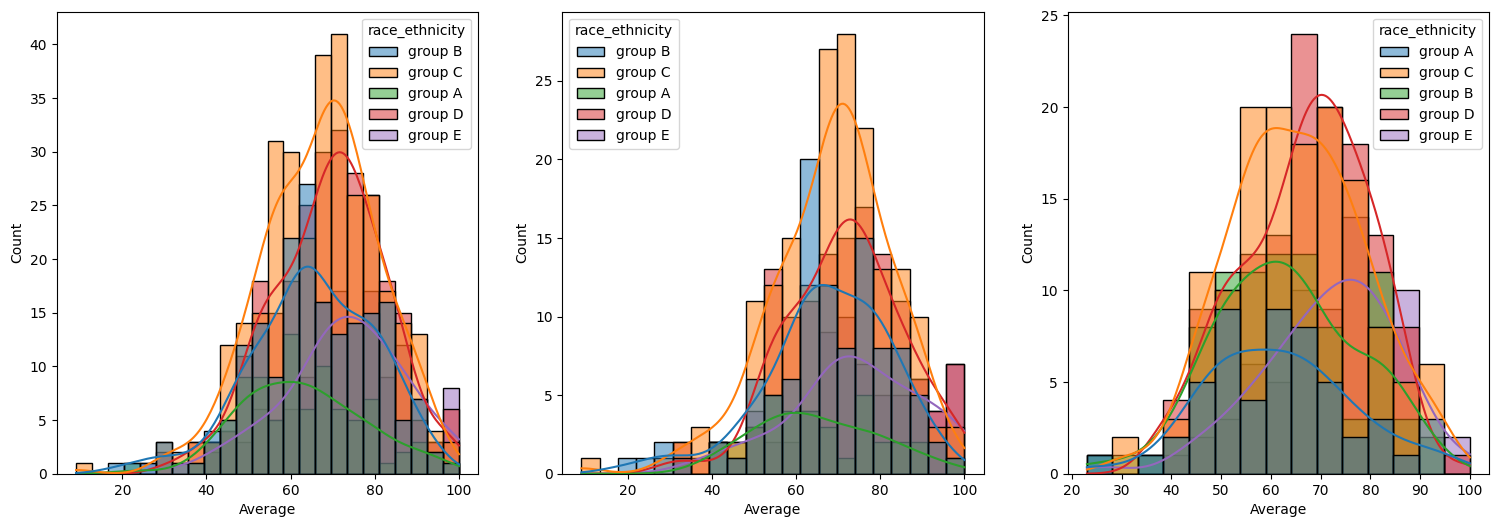

In [101]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [102]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### Maximumum score of students in all three subjects

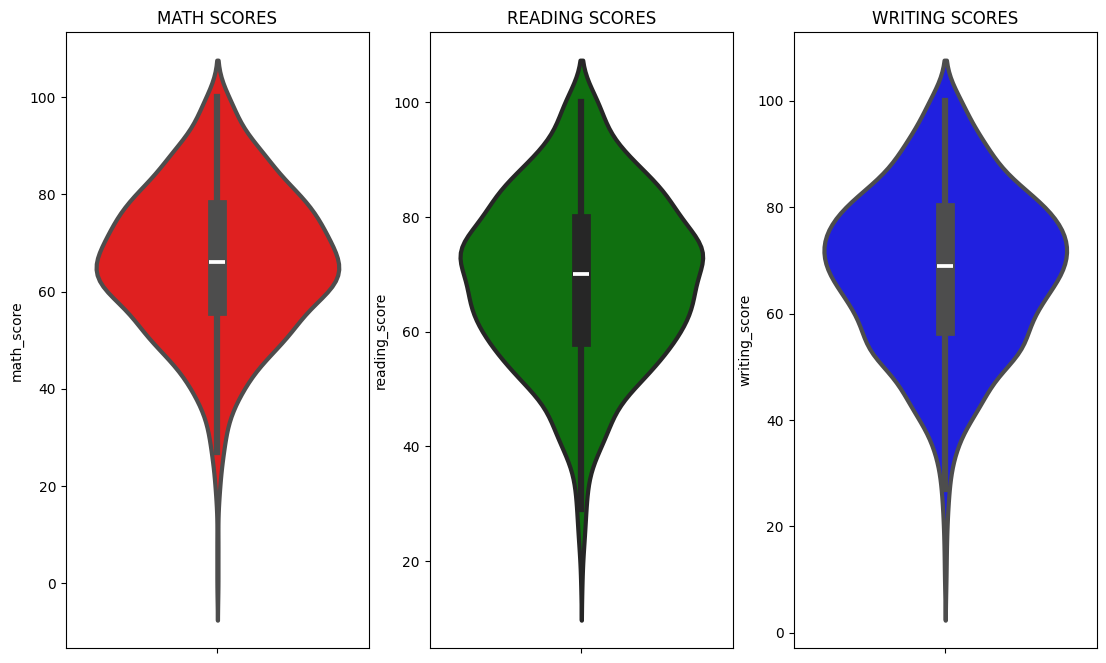

In [103]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### Multivariate analysis using pieplot

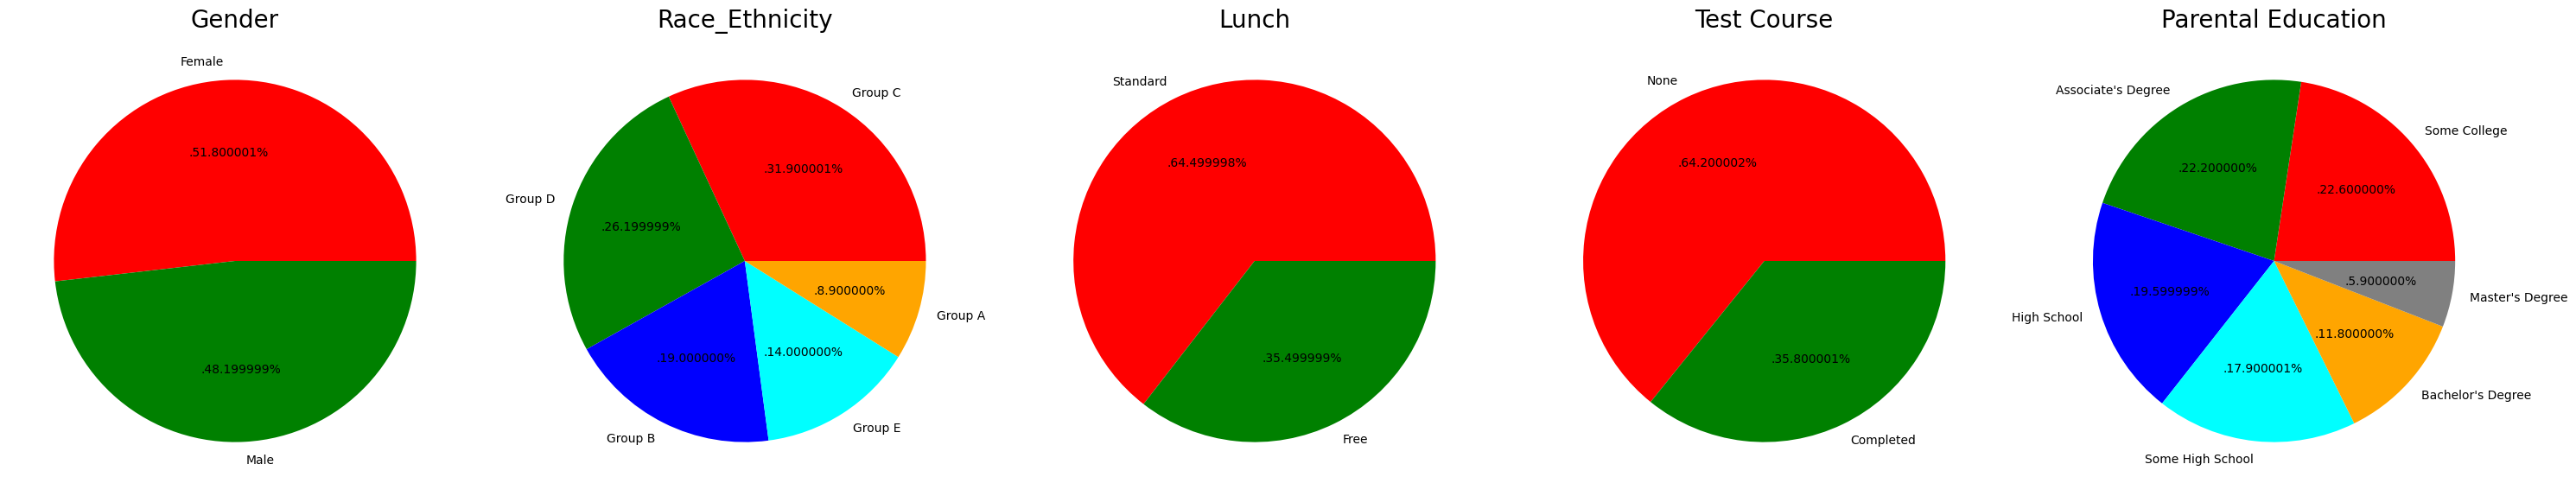

In [104]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### Feature Wise visualization

GENDER COLUMN
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

In [105]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


* How is distribution of Gender ? ( Univariate analysis )

We will distinguish with the help of countplot

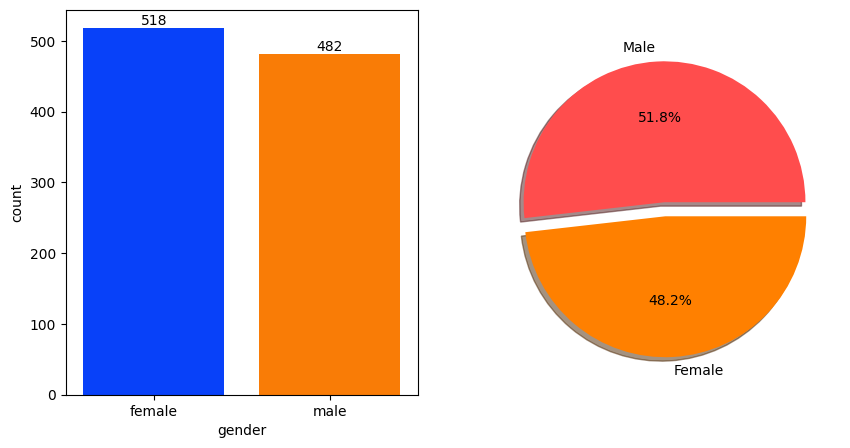

In [106]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Bivariate Analysis ( Is gender has any impact on students performance ?)

In [107]:
gender_group = df.groupby('gender')[['math_score','reading_score','writing_score','Total_score']].mean()
gender_group

,math_score,reading_score,writing_score,Total_score
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


In [108]:
gender_group['math_score'][0]

63.633204633204635

In [109]:
np.arange(3)

array([0, 1, 2])

In [110]:
gender_group.columns

Index(['math_score', 'reading_score', 'writing_score', 'Total_score'], dtype='object')

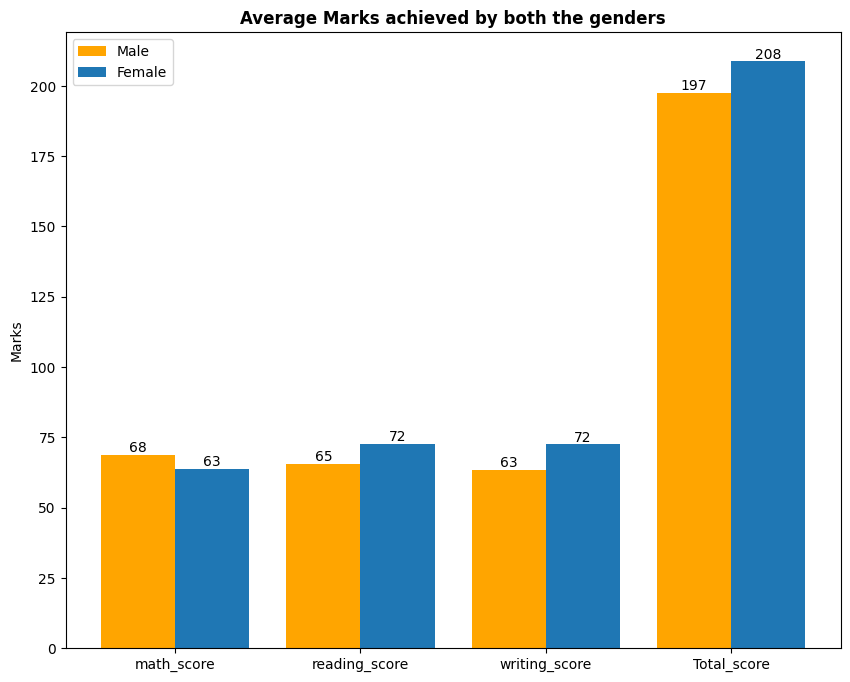

In [111]:
plt.figure(figsize=(10,8))
x=len(gender_group.columns)

female_scores = [gender_group[i][0] for i in gender_group.columns]
male_scores = [gender_group[i][1] for i in gender_group.columns]

x_axis=np.arange(x)

male = plt.bar(x_axis-0.2,male_scores,0.4,label='Male',color='orange')
female = plt.bar(x_axis+0.2,female_scores,0.4,label='Female')
plt.bar_label(male,fmt='%d')
plt.bar_label(female,fmt='%d')
plt.xticks(x_axis,gender_group.columns)
plt.ylabel("Marks")
plt.title("Average Marks achieved by both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

RACE_EHNICITY COLUMN
* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?

In [112]:
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
Total_score                    194
Average                        194
dtype: int64

In [113]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

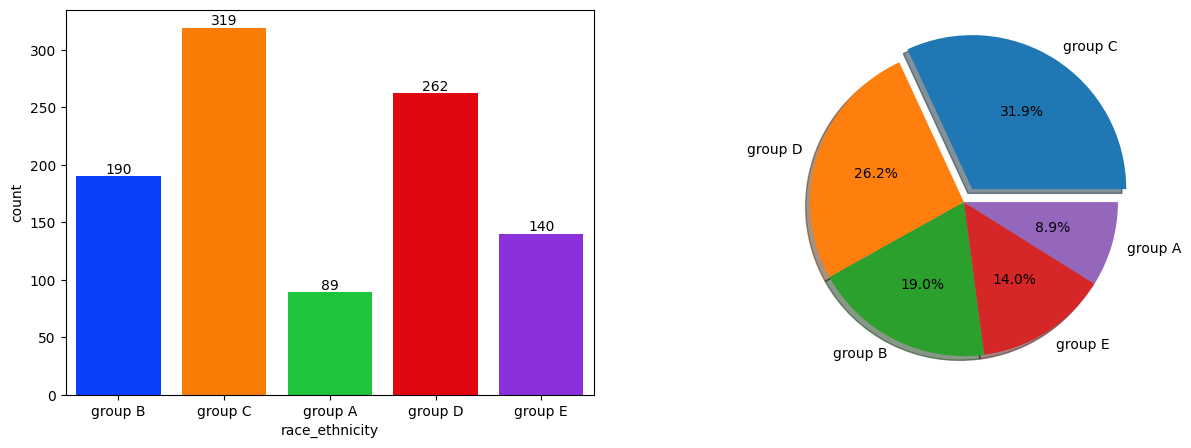

In [114]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Insights
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

In [ ]:
# race_group['math_score'][0:]

race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64

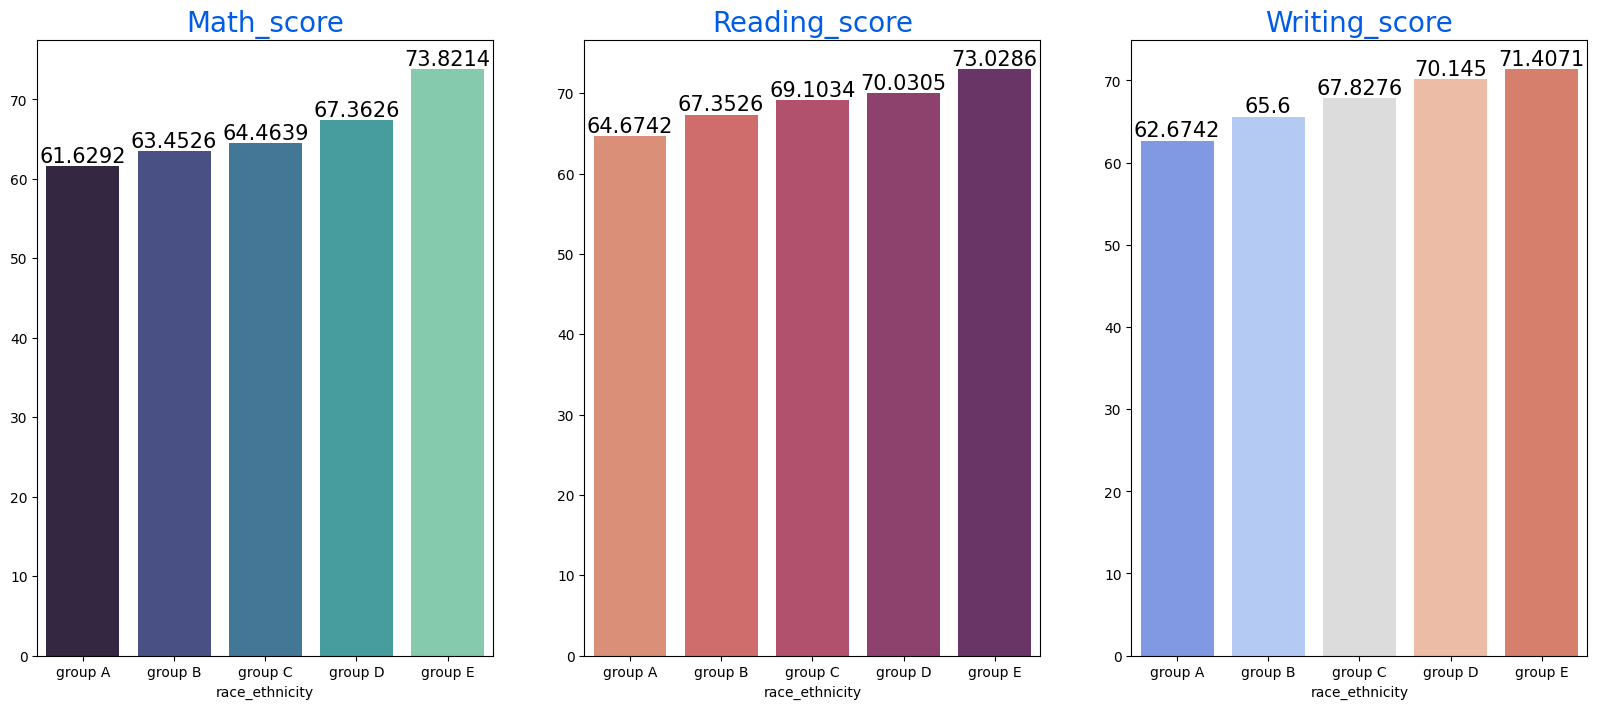

In [127]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [133]:
Group_data2['math_score'].mean().index # to get row names
Group_data2['math_score'].mean().values # to get col values

array([61.62921348, 63.45263158, 64.46394984, 67.36259542, 73.82142857])

In [137]:
Group_data2=df.groupby('race_ethnicity')
Group_data2

### Checking outliers

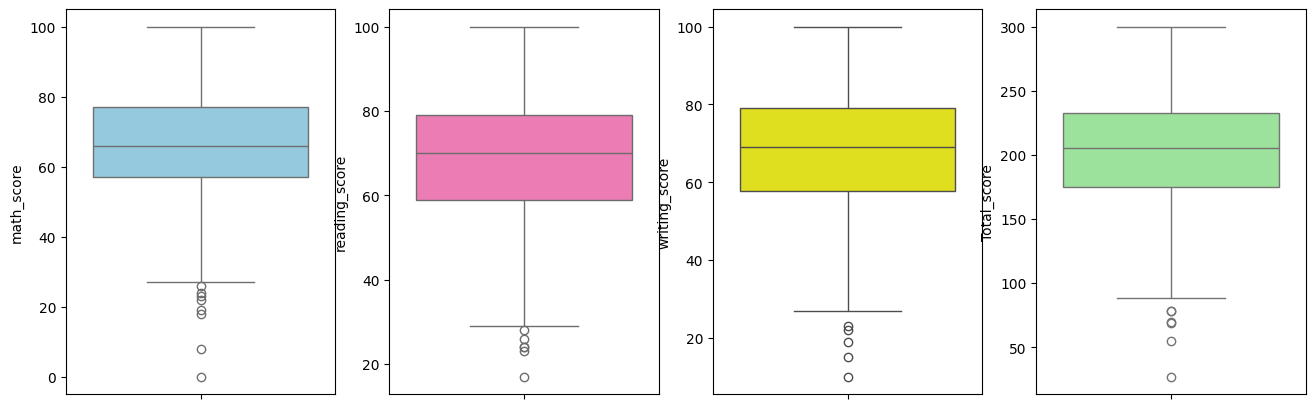

In [140]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Total_score'],color='lightgreen')
plt.show()

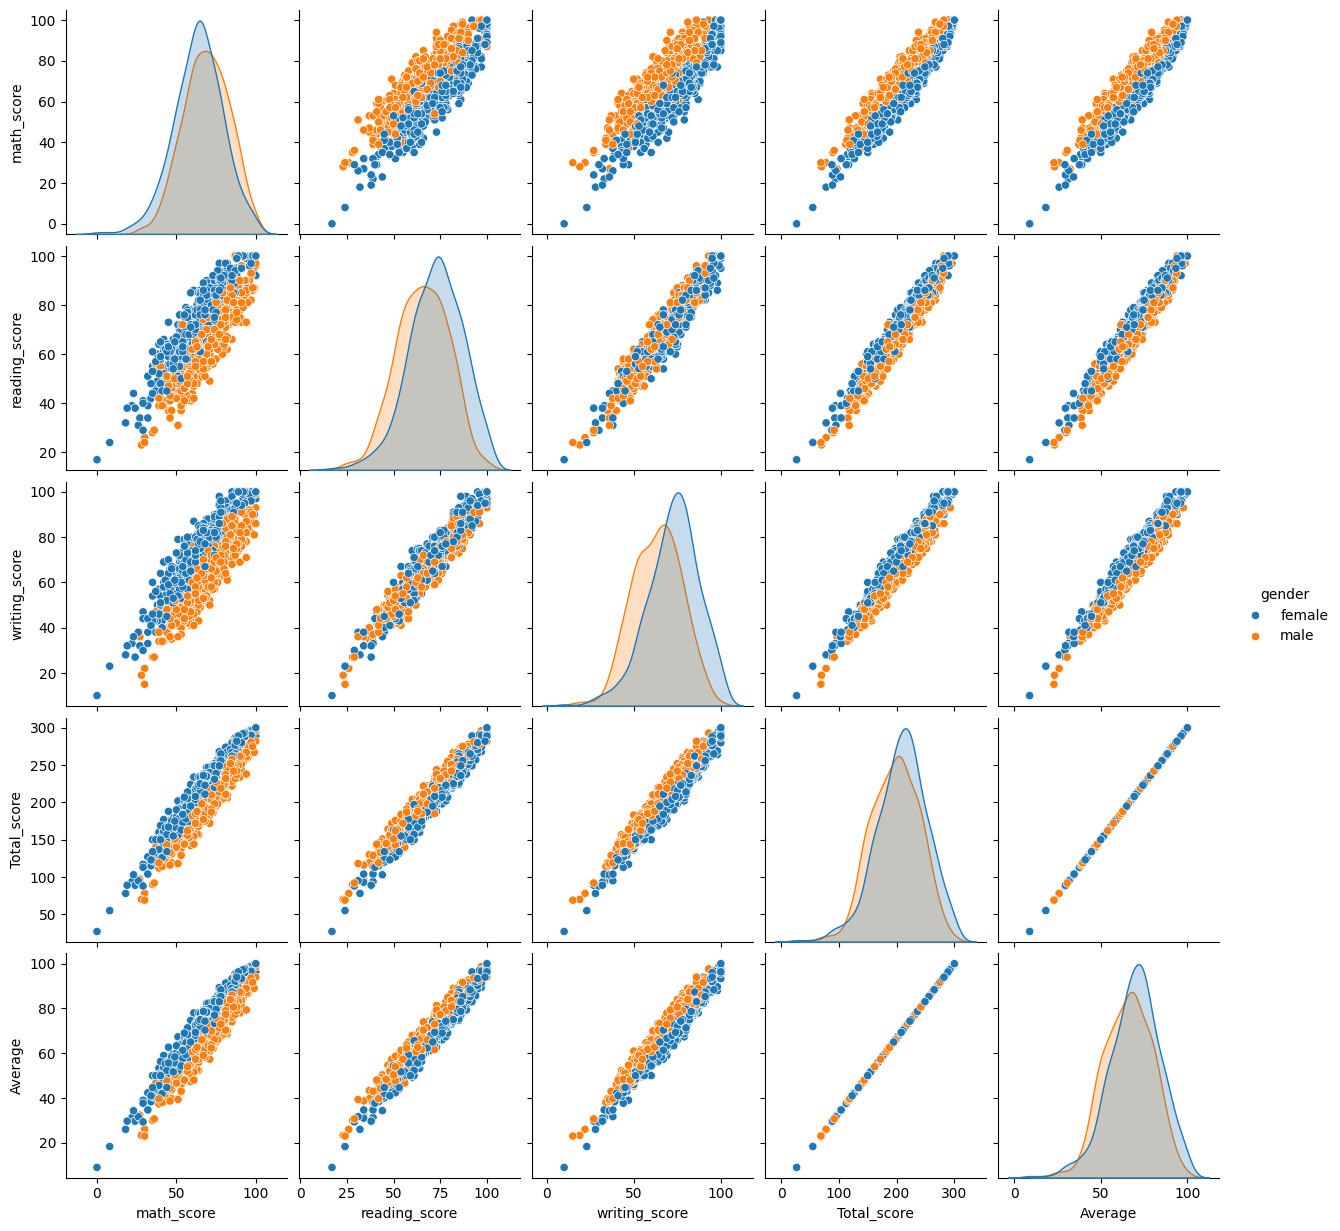

In [141]:
sns.pairplot(df,hue = 'gender')
plt.show()